In [1]:
from wisdom_of_crowds import Crowd
import networkx as nx
import random

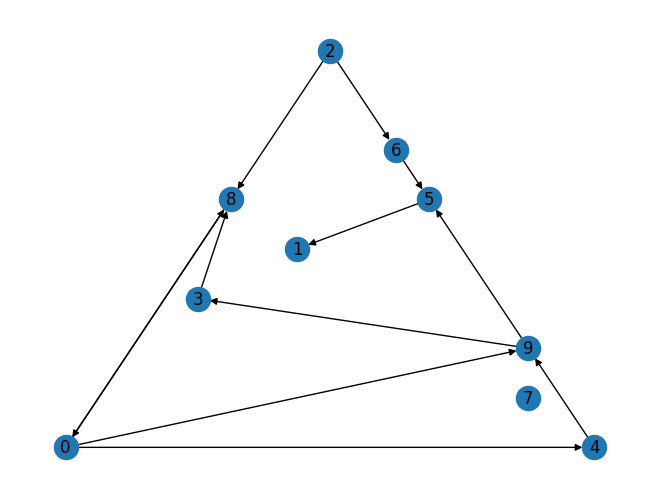

In [2]:
seed = 12  # Seed random number generators for reproducibility
DG = nx.fast_gnp_random_graph(10, 0.1, seed=seed, directed=True)

DG.remove_edges_from(nx.selfloop_edges(DG))

labels={}
for n in DG:
    labels[n] = n
"""for node in DG:
    num_topics = random.randint(0,2) + 1
    topic = set()
    for i in range(num_topics):
        die = random.randint(0, 5) + 1
        topic.update(chr(ord('@')+die))
    DG.nodes[node]['T'] = topic
    if len(topic)==1:
        for t in topic:
            labels[node] = node, t
    else:
        labels[node] = node, topic
    output = str()
    for p in DG.predecessors(node):
        output += str(p)
        output += " "
    print("Node: ", node, "Topic: ", DG.nodes[node]['T'], "Predecessors: ", output) """


nx.draw_planar(DG, labels=labels)

In [3]:
test = Crowd(DG)
reverse = Crowd(nx.reverse(DG))

In [4]:
r_output = reverse.census()
t_output = test.census(topics=True)

mismatch = False
for n in t_output:
	print("Test result  for T for node {} is {} and h_t is {} and for S is {} and h is {}".format(n, t_output[n]['St'], t_output[n]['Ht'], t_output[n]['S'], t_output[n]['H']))
	if t_output[n]['St'] != r_output[n]['S']:
		mismatch = True
		print("GROUND TRUTH for T for node {} is {} and h_t is {}".format(n, r_output[n]['S'], r_output[n]['H']))
		
if mismatch == False:
	print("All nodes match the ground truth!")

Test result  for T for node 0 is (6, 3, 2) and h_t is 2 and for S is (0, 0, 0) and h is 0
Test result  for T for node 1 is (0, 0, 0) and h_t is 0 and for S is (0, 0, 0) and h is 0
Test result  for T for node 2 is (10, 5, 2) and h_t is 2 and for S is (0, 0, 0) and h is 0
Test result  for T for node 3 is (0, 0, 0) and h_t is 0 and for S is (0, 0, 0) and h is 0
Test result  for T for node 4 is (0, 0, 0) and h_t is 0 and for S is (0, 0, 0) and h is 0
Test result  for T for node 5 is (0, 0, 0) and h_t is 0 and for S is (10, 5, 2) and h is 2
Test result  for T for node 6 is (0, 0, 0) and h_t is 0 and for S is (0, 0, 0) and h is 0
Test result  for T for node 7 is (0, 0, 0) and h_t is 0 and for S is (0, 0, 0) and h is 0
Test result  for T for node 8 is (0, 0, 0) and h_t is 0 and for S is (10, 5, 2) and h is 2
Test result  for T for node 9 is (10, 5, 2) and h_t is 2 and for S is (2, 1, 2) and h is 1
All nodes match the ground truth!


In [5]:
def dfs_postorder_edges(G, source=None, depth_limit=None,*, sort_neighbors=None):
    edges = nx.dfs_labeled_edges(G, source=source, depth_limit=depth_limit, sort_neighbors=sort_neighbors)
    for u,v,d in edges:
        if d == 'reverse' or  d == 'nontree':
            yield u,v

In [11]:
debug_output = ""

test_node = 8
for edge in DG.predecessors(test_node):
	debug_output += " " + str(edge)
print(test_node, "'s predecessors: ", debug_output)
print("D for", test_node, "is", test.D(test_node))
print("D for", test_node, "calculated edge-wise is", test.D_edge(test_node))
d_l = 3
print("D for", test_node, "limited to distance of", d_l, "is", test.D_edge(test_node, depth=d_l))
selection = {3, 0}
print("D for {} looking only at sources {} is".format(test_node, selection), test.D_edge(test_node, selection=selection))

8 's predecessors:   0 2 3
D for 8 is 1
D for 8 calculated edge-wise is 0
D for 8 limited to distance of 3 is 0
D for 8 looking only at sources {0, 3} is 0
0: D:1 S:0 pi:0 St:6 pi_t:6
1: D:1 S:0 pi:0 St:0 pi_t:0
2: D:0 S:0 pi:0 St:10 pi_t:0
3: D:1 S:0 pi:0 St:0 pi_t:0
4: D:1 S:0 pi:0 St:0 pi_t:0
5: D:1 S:10 pi:10 St:0 pi_t:0
6: D:1 S:0 pi:0 St:0 pi_t:0
7: D:0 S:0 pi:0 St:0 pi_t:0
8: D:1 S:10 pi:10 St:0 pi_t:0
9: D:1 S:2 pi:2 St:10 pi_t:10


In [14]:
for n in DG:
	print("{}: D:{} S:{} pi:{} St:{} pi_t:{}".format(n, t_output[n]['D'], t_output[n]['S'][0], t_output[n]['pi'], t_output[n]['St'][0], t_output[n]['pi_t']))


0: D:1 S:0 pi:0 St:6 pi_t:6
1: D:1 S:0 pi:0 St:0 pi_t:0
2: D:0 S:0 pi:0 St:10 pi_t:0
3: D:1 S:0 pi:0 St:0 pi_t:0
4: D:1 S:0 pi:0 St:0 pi_t:0
5: D:1 S:10 pi:10 St:0 pi_t:0
6: D:1 S:0 pi:0 St:0 pi_t:0
7: D:0 S:0 pi:0 St:0 pi_t:0
8: D:1 S:10 pi:10 St:0 pi_t:0
9: D:1 S:2 pi:2 St:10 pi_t:10


In [7]:
test_node=9
print("S for", test_node, "is", test.S(test_node), "and H is", test.h_measure(test_node))
reverse = Crowd(nx.reverse(DG))

print("Ground truth for T for test node is", reverse.S(test_node), "and h_t is", reverse.h_measure(test_node))
print("Test result is", test.S(test_node, transmit=True), test.h_measure(test_node, transmit=True))

S for 9 is 2 and H is 1
Ground truth for T for test node is (10, 5, 2) and h_t is 2
Test result is 10 2


In [8]:
seed = 22  # Seed random number generators for reproducibility
LG = nx.fast_gnp_random_graph(100, 0.05, seed=seed, directed=True)

LG.remove_edges_from(nx.selfloop_edges(DG))

labels = {}
for node in LG:
    num_topics = random.randint(0,2) + 1
    topic = set()
    for i in range(num_topics):
        die = random.randint(0, 5) + 1
        topic.update(chr(ord('@')+die))
    LG.nodes[node]['T'] = topic
    if len(topic)==1:
        for t in topic:
            labels[node] = node, t
    else:
        labels[node] = node, topic
    output = str()
    for p in LG.predecessors(node):
        output += str(p)
        output += " "
    print("Node: ", node, "Topic: ", LG.nodes[node]['T'], "Predecessors: ", output)

Node:  0 Topic:  {'F'} Predecessors:  5 36 43 54 75 88 90 
Node:  1 Topic:  {'A', 'F', 'C'} Predecessors:  14 15 29 33 82 83 90 
Node:  2 Topic:  {'F', 'E'} Predecessors:  21 51 75 
Node:  3 Topic:  {'F', 'D'} Predecessors:  4 12 38 41 83 
Node:  4 Topic:  {'E', 'C', 'B'} Predecessors:  15 26 74 82 86 
Node:  5 Topic:  {'A'} Predecessors:  15 52 58 62 84 
Node:  6 Topic:  {'A', 'F'} Predecessors:  13 88 
Node:  7 Topic:  {'D', 'B'} Predecessors:  14 41 63 71 94 
Node:  8 Topic:  {'F', 'B'} Predecessors:  25 40 71 80 99 
Node:  9 Topic:  {'D', 'E'} Predecessors:  23 38 53 69 90 
Node:  10 Topic:  {'F'} Predecessors:  25 32 34 47 
Node:  11 Topic:  {'D'} Predecessors:  6 9 10 13 82 83 91 
Node:  12 Topic:  {'A', 'E', 'B'} Predecessors:  57 89 
Node:  13 Topic:  {'D', 'A', 'F'} Predecessors:  33 
Node:  14 Topic:  {'C'} Predecessors:  35 37 66 70 72 81 88 91 99 
Node:  15 Topic:  {'C'} Predecessors:  22 34 50 88 
Node:  16 Topic:  {'A', 'C'} Predecessors:  30 47 57 
Node:  17 Topic:  {'F'

In [9]:
large_test = Crowd(LG)
large_reverse = Crowd(nx.reverse(LG))
test_node=14
large_test.max_m=10

""" print("S for", test_node, "is", large_test.S(test_node), "and H is", large_test.h_measure(test_node))

print("Ground truth for T for test node is", large_reverse.S(test_node), "and h_t is", large_reverse.h_measure(test_node))
print("Test result is", large_test.T(test_node), large_test.ht_measure(test_node)) """

l_r_output = large_reverse.census()
l_t_output = large_test.census()

mismatch = False
for n in l_t_output:
	if l_t_output[n]['St'] != l_r_output[n]['S']:
		mismatch = True
		print("Ground truth for T for node {} is {} and h_t is {}".format(n, l_r_output[n]['S'], l_r_output[n]['H']))
		print("Test result  for T for node {} is {} and h_t is {}".format(n, l_t_output[n]['St'], l_t_output[n]['Ht']))
if not mismatch:
	print("All nodes match the ground truth!")


All nodes match the ground truth!
